In [ ]:
# comparing 2D LD count (RLP) to 3D LD count (JDW)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wesanderson

In [33]:
ldFile = 'C:/Users/jaked/Documents/TsaiRLP/Subiculum-LD/data/6mo/LD.csv'
ldDf = pd.read_csv(ldFile)

cols = ['ID', 'Gender', '3D LD Count', '3D LD Density', 'Avg Vol', 'Integrated Intensity Density', 'Subiculum Volume']

id_regex = r'mouse\s*(\d+)'
gender_regex = r'([FM])'
#treatment = ldDf['Image'].apply(lambda x: 'rLP' in x)

ldDf['ID'] = ldDf['Image'].str.extract(id_regex)
ldDf['Gender'] = ldDf['Image'].str.extract(gender_regex)
#ldDf['Treatment'] = np.where(treatment, 'rLP', 'control')
ldDf = ldDf.rename(columns={'n': '3D LD Count'})
ldDf['Subiculum Volume'] = ldDf['Subiculum Area'] * ldDf['Z Stack']
ldDf['3D LD Density'] = ldDf['3D LD Count'] / ldDf['Subiculum Volume']

ldDf = ldDf[['ID', 'Gender', '3D LD Count', '3D LD Density', 'Avg Vol', 'Integrated Intensity Density', 'Subiculum Volume']]
#ldDf.set_index('ID', inplace=True)
ldDf = ldDf.sort_values(by='ID')

ldDf

,ID,Gender,3D LD Count,3D LD Density,Avg Vol,Integrated Intensity Density,Subiculum Volume
0,18,M,17419,1.767240e-04,2.3166,4.242491e+10,98566144
1,18,M,26589,2.697579e-04,1.8238,5.121233e+10,98566144
2,19,M,37215,2.730076e-04,2.2149,8.587295e+10,136314880
3,19,M,34023,2.495912e-04,2.3416,6.431238e+07,136314880
4,20,F,12890,9.913598e-05,3.5653,9.194430e+10,130023424
5,20,F,14877,1.144178e-04,3.1537,3.053868e+07,130023424
6,21,F,3330,3.083238e-05,1.8094,5.476656e+10,108003328
7,21,F,8251,7.639579e-05,1.8302,9.539346e+10,108003328
8,22,F,8155,4.469663e-05,2.3432,1.220000e+11,182452224
9,22,F,10395,5.697382e-05,2.5844,1.400000e+11,182452224


In [34]:
def process_replicates(df):
    """
    Identifies technical replicates and processes them. Average numerical values, and copy over metadata, which should be matching between the samples.
    
    Technical replicates: datapoints with matching sample #s and gender.
    """
    
    grouped = df.groupby(['ID', 'Gender'])

    # identify technical replicates (groups with more than 1 row)
    technical_replicates = [group for _, group in grouped if len(group) > 1]
    for replicate_pair in technical_replicates:
        
        # average replicate rows and add new row to df
        rep1 = replicate_pair.iloc[0]
        avg_rep = replicate_pair.mean(numeric_only=True)
        avg_rep['ID'] = rep1['ID']
        avg_rep['Gender'] = rep1['Gender']
        avg_rep = avg_rep[cols]
        avg_rep = pd.DataFrame([avg_rep])

        # delete old rows, add averaged row
        df = df[df['ID'] != rep1['ID']]
        df = pd.concat([df, avg_rep], ignore_index=True)

    
    return df


,Gender,3D LD Count,3D LD Density,Avg Vol,Integrated Intensity Density,Subiculum Volume
ID,,,,,,
18,M,22004.0,0.000223,2.07020,4.681862e+10,98566144.0
19,M,35619.0,0.000261,2.27825,4.296863e+10,136314880.0
20,F,13883.5,0.000107,3.35950,4.598742e+10,130023424.0
21,F,5790.5,0.000054,1.81980,7.508001e+10,108003328.0
22,F,9275.0,0.000051,2.46380,1.310000e+11,182452224.0
23,M,16090.0,0.000139,2.55340,7.580685e+10,115343360.0
24,M,1550.5,0.000021,0.54610,5.478114e+10,75497472.0
25,F,14311.0,0.000136,3.03870,9.071760e+10,104857600.0
26,F,15992.0,0.000209,2.70060,5.392066e+10,76546048.0


In [ ]:
ldDf = process_replicates(ldDf)
ldDf = ldDf.set_index('ID').sort_values(by='ID')
ldDf.to_csv('6mo_ld_samples.csv')
ldDf

In [6]:
palette = wesanderson.film_palette('The Grand Budapest Hotel')
sns.set_palette(palette)
sns.set_style('white')

Text(0.5, 1.0, '(3D) LD Clearance by Treatment')

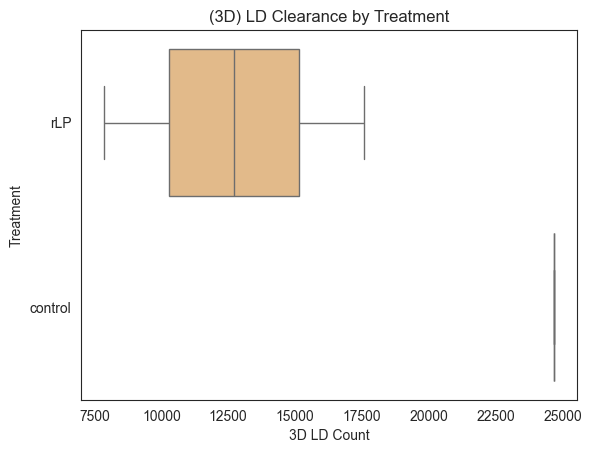

In [20]:
# quantify LD clearance by treatment

sns.boxplot(data=ldDf, x="3D LD Count", y='Treatment', order=['rLP', 'control']) # hue='Gender'
plt.title('(3D) LD Clearance by Treatment')

Text(0.5, 1.0, 'LD Density by Treatment')

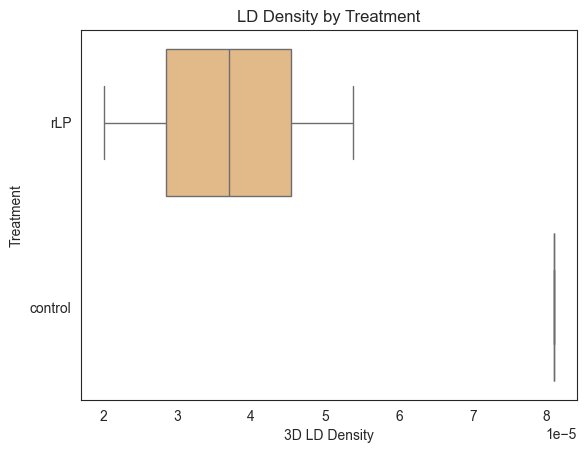

In [23]:
# changes in LD density by treatment -- should observe the same as count

sns.boxplot(data=ldDf, x="3D LD Density", y='Treatment', order=['rLP', 'control']) # hue='Gender'
plt.title('LD Density by Treatment')

In [12]:
# changes in LD vol

sns.boxplot(data=ldDf, x='Avg Vol', y='Treatment', order=['rLP', 'control'])
plt.title('Avg LD Vol by Treatment')

ValueError: Could not interpret value `Treatment` for `y`. An entry with this name does not appear in `data`.

Text(0.5, 1.0, 'IID vs. (3D) LD Count')

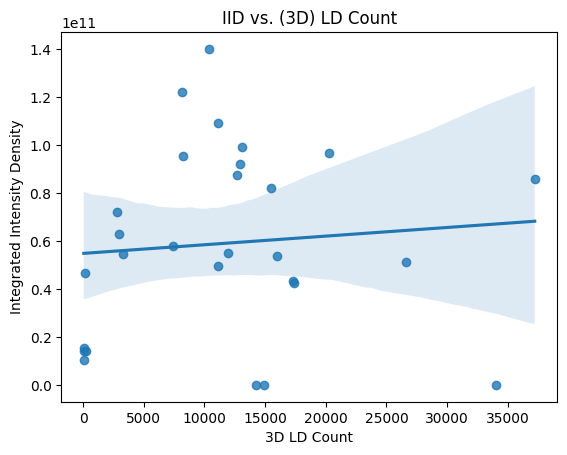

In [10]:
# does IID validate our calculation of LD count?

sns.regplot(data=ldDf, x="3D LD Count", y="Integrated Intensity Density")
plt.title("IID vs. (3D) LD Count")

Text(0.5, 1.0, 'IID vs. LD Density')

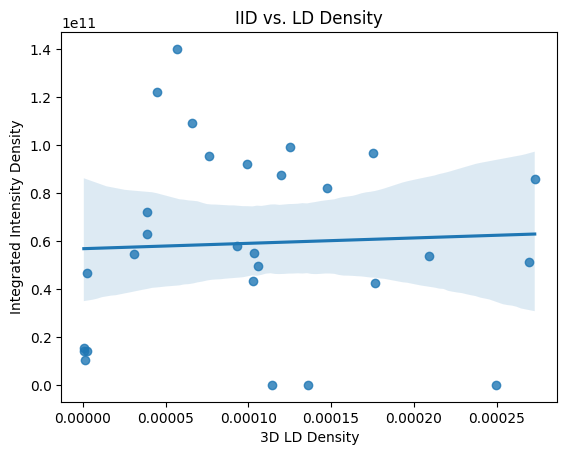

In [11]:
# does IID validate our calculation of LD density?

sns.regplot(data=ldDf, x="3D LD Density", y="Integrated Intensity Density")
plt.title("IID vs. LD Density")

In [ ]:
# needs more data to measure ΔLD_Count w/i one mouse